# Explanation of the Data : 
The data is for customers of the treadmill product(s) of a retail store called Cardio Good Fitness.

# Objective: 
 
 Explore the dataset and practice extracting basic observations about the data and to find out solutions for some bussines problems.

# Key questions to be answered:

* what products do affect the most of costumer running performance(Miles) by the age, gender?
* what are the products usage by gender, age?
* which product usage does affect most to the fitness score of the costumer?
* what product do costumers use more by the gender and age? 
* How income affects usage of the products?
* 

# Dataset:

1.	Product - the model number of the treadmill
2.	Age - in number of years, of the customer
3.	Gender - of the customer
4.	Education - in number of years, of the customer
5.	Marital Status - of the customer
6.	Usage - Avg. # times the customer wants to use the treadmill every week
7.	Fitness - Self rated fitness score of the customer (5 - very fit, 1 - very unfit)
8.	Income - of the customer
9.	Miles- expected to run


### Import the necessary packages - pandas, numpy, seaborn, matplotlib.pyplot

In [1]:
import pandas as pd # import pandas library
import numpy as np # import numpay library
import seaborn as sns # import seaborn library for data visulizing 
import matplotlib.pyplot as plt # import matplotlib library
%matplotlib inline    
## all matplotlib inline not stored in memory to fast execution and save memory. 
plt.style.use("ggplot") ## to select matplotlib grahical style
import warnings # to ignore any version or something errors.
pd.set_option('display.float_format', lambda x: '%.3f' % x) # To supress numerical display in scientific notations

### Read in the dataset

In [2]:
cardio = pd.read_csv("CardioGoodFitness.csv")

### Pandas-Profilling

In [3]:
import pandas_profiling

profile= pandas_profiling.ProfileReport(cardio, title='Pandas Profiling Report')
profile.to_file("Yunus_Kazan_Cardio_Pandas_profilling_output.html")
profile

Summarize dataset:   0%|          | 0/22 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Observations:
* No missing value and there is many higly correlative variable to each other.
* we will look into details.

### View the first few rows of the dataset

In [4]:
cardio.head()

Product  Age  Gender  Education MaritalStatus  Usage  Fitness  Income  Miles
0   TM195   18    Male         14        Single      3        4   29562    112
1   TM195   19    Male         15        Single      2        3   31836     75
2   TM195   19  Female         14     Partnered      4        3   30699     66
3   TM195   19    Male         12        Single      3        3   32973     85
4   TM195   20    Male         13     Partnered      4        2   35247     47

Observations: The dataset looks clean and consistent with the description provided in the Data Dictionary.

### Check the shape of the dataset

In [5]:
cardio.shape

(180, 9)

In [6]:
cardio.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

Observations: We have 180 rows and 9 columns which are that 'Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'

### Check the datatype of the variables to make sure that the data is read in properly

In [7]:
cardio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


Observations: 
1. Product is object data type
2. Gender is object data type
3. MaritalStatus is object data type 
4. All the other variables are numerical and there for their python data types (int64) are ok.

### Let us analyse the quantitative variables in the dataset

In [8]:
cardio.describe()

Age  Education   Usage  Fitness     Income   Miles
count 180.000    180.000 180.000  180.000    180.000 180.000
mean   28.789     15.572   3.456    3.311  53719.578 103.194
std     6.943      1.617   1.085    0.959  16506.684  51.864
min    18.000     12.000   2.000    1.000  29562.000  21.000
25%    24.000     14.000   3.000    3.000  44058.750  66.000
50%    26.000     16.000   3.000    3.000  50596.500  94.000
75%    33.000     16.000   4.000    4.000  58668.000 114.750
max    50.000     21.000   7.000    5.000 104581.000 360.000

In [9]:
cardio.skew()

Age         0.982
Education   0.622
Usage       0.739
Fitness     0.455
Income      1.292
Miles       1.724
dtype: float64

Observations:
1. Age are spread over a huge range from 18 to 50.
2. The mean of Age is close to the 75% percentile of the data, indicating a right skew.
3. The mean of Education is very close to the 75% percentile of the data, indicating a right skew.
4. The mean of Usage is very close to the 75% percentile of the data, indicating a right skew.
5. The mean of Income is close to the 75% percentile of the data, indicating a right skew.
6. Standard deviation of Miles is high
7. Miles also has huge spread ranging from 21 mil to 360 mil
8. income also has huge spread ranging from 29000 mil to 105000 mil

#### How many Product are included in the dataset?

In [10]:
cardio["Product"].nunique()

3

#### How many Age are included in the dataset?

In [11]:
cardio["Age"].nunique()

32

In [12]:
cardio["Age"].unique()

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 43, 44, 46, 47, 50, 45, 48, 42],
      dtype=int64)

#### How many Fitnes score are included in the dataset?

In [13]:
cardio["Fitness"].nunique()

5

In [14]:
cardio["Fitness"].unique()

array([4, 3, 2, 1, 5], dtype=int64)

#### Which are the Products that are included in this dataset?

In [15]:
cardio["Product"].unique()

array(['TM195', 'TM498', 'TM798'], dtype=object)

#### Calculate the average usage for each product

In [16]:
cardio[["Product", "Usage"]].groupby("Product").mean().round().sort_values(by = "Product", ascending = False)

Usage
Product       
TM798    5.000
TM498    3.000
TM195    3.000

#### How many Age and Fitness score data is provided in the dataset?

In [17]:
f'The Age data is from {cardio["Age"].min()} through {cardio["Age"].max()}'

'The Age data is from 18 through 50'

In [18]:
f'The Fitness data is from {cardio["Fitness"].min()} through {cardio["Fitness"].max()}'

'The Fitness data is from 1 through 5'

#### Calculate the average usage for products by the gender and age and Fitness score

In [19]:
cardio[["Usage", "Gender"]].groupby("Gender").mean().round().sort_values(by = "Usage", ascending = False)

Usage
Gender       
Male    4.000
Female  3.000

In [20]:
cardio[["Usage", "Fitness"]].groupby("Fitness").mean().round().sort_values(by = "Usage", ascending = False)

Usage
Fitness       
5        5.000
4        4.000
2        3.000
3        3.000
1        2.000

In [21]:
cardio[["Usage", "Age"]].groupby("Age").mean().round().sort_values(by = "Usage", ascending = False)

Usage
Age       
42   5.000
34   4.000
27   4.000
36   4.000
40   4.000
41   4.000
32   4.000
30   4.000
29   4.000
28   4.000
26   4.000
24   4.000
45   4.000
47   4.000
39   4.000
38   3.000
44   3.000
43   3.000
46   3.000
48   3.000
18   3.000
35   3.000
19   3.000
33   3.000
31   3.000
25   3.000
23   3.000
22   3.000
21   3.000
20   3.000
50   3.000
37   2.000

#### What is the maximum income and Education year in dataset?

In [22]:
cardio[cardio["Income"]==cardio["Income"].max()]

Product  Age Gender  Education MaritalStatus  Usage  Fitness  Income  \
174   TM798   38   Male         18     Partnered      5        5  104581   
178   TM798   47   Male         18     Partnered      4        5  104581   

     Miles  
174    150  
178    120

In [23]:
cardio[cardio.Education==cardio.Education.max()]

Product  Age  Gender  Education MaritalStatus  Usage  Fitness  Income  \
157   TM798   26  Female         21        Single      4        3   69721   
161   TM798   27    Male         21     Partnered      4        4   90886   
175   TM798   40    Male         21        Single      6        5   83416   

     Miles  
157    100  
161    100  
175    200

#### Looking at the relationship between numerical variables using distplot, pair plots and correlation plots

In [24]:
cardio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


C:\Users\kazayu01\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\kazayu01\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


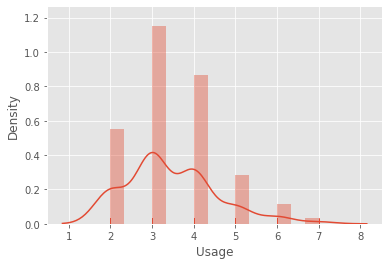

In [25]:
sns.distplot(cardio['Usage'], kde = True, rug=True);

Observation:

* Mostly, All People use the products averagely 3 days a week.

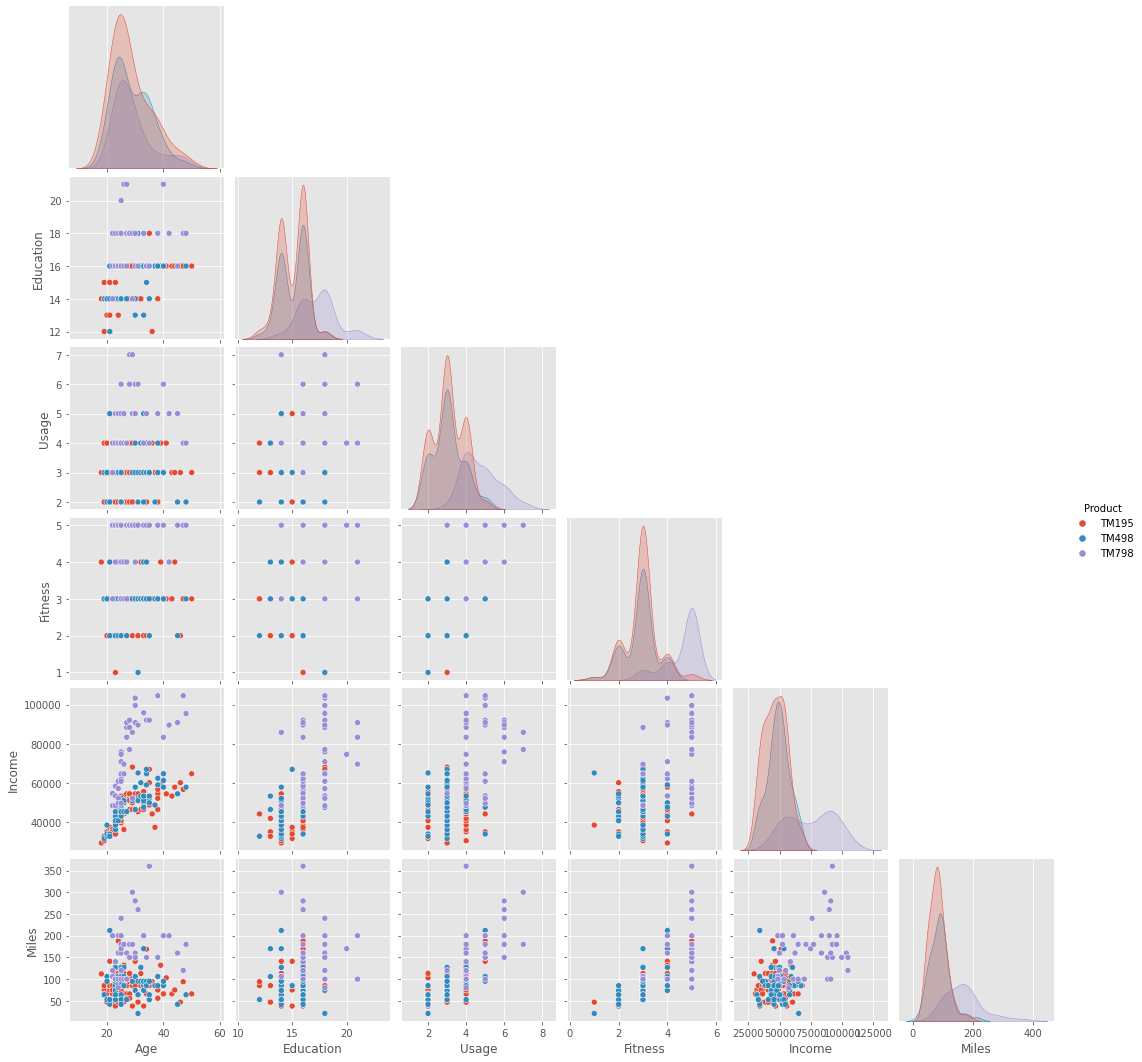

In [26]:
sns.pairplot(cardio, corner = True, hue= 'Product');

In [27]:
correlation = cardio.corr() # creating a 2-D Matrix with correlation plots
correlation

Age  Education  Usage  Fitness  Income  Miles
Age       1.000      0.280  0.015    0.061   0.513  0.037
Education 0.280      1.000  0.395    0.411   0.626  0.307
Usage     0.015      0.395  1.000    0.669   0.520  0.759
Fitness   0.061      0.411  0.669    1.000   0.535  0.786
Income    0.513      0.626  0.520    0.535   1.000  0.543
Miles     0.037      0.307  0.759    0.786   0.543  1.000

<AxesSubplot:>

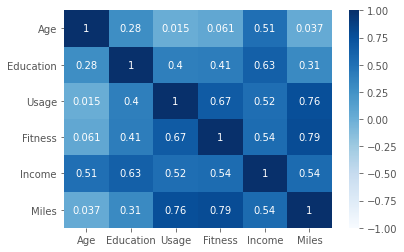

In [28]:
sns.heatmap(correlation, annot=True, cmap='Blues', vmin=-1, vmax=1)
# heatmap is to see correlation between variables clearly, darker cell are more correlated

Observations:
1. Usage has a high positive correlation with Fitness and Miles. As expected, all these values are highly correlated with each other.
2. Income has a high positive correlation with Education.
3. Age has a positive correlation with Income, but not so high. we will look into it.  
4. Same Income case is with Usage and Fitness data, but not so high. we will look into it. 
5. Income has a positive correlation with Miles but not so high. No make sense, we will look into details.

### Looking at the overall to answer questions we asked above

#### Looking at what are the products usage by gender?

In [29]:
cardio.groupby(['Product'])['Usage'].mean().reset_index()

Product  Usage
0   TM195  3.087
1   TM498  3.067
2   TM798  4.775

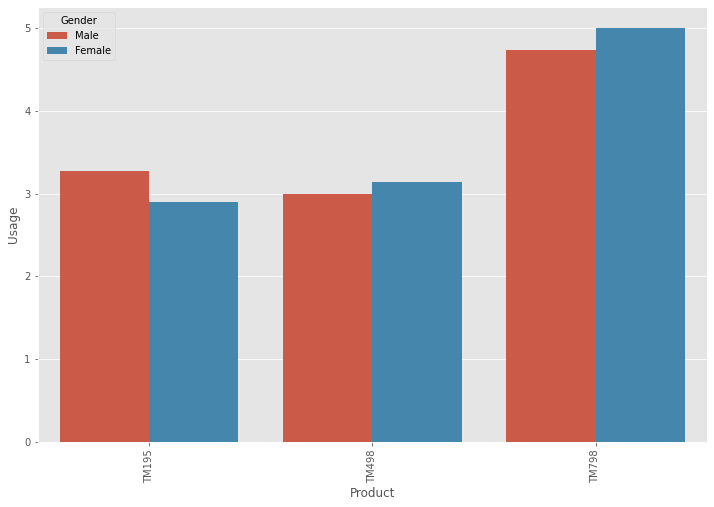

In [30]:
#from numpy import mean
plt.figure(figsize=(12,8))
sns.barplot(x='Product', y='Usage', data=cardio, ci=None, hue= 'Gender')
plt.xticks(rotation=90); # To rotate the x axis labls
# plt.ylim(0,6000000)



Observations: 
1. The overall, TM798 product weekly usage is more than others.
2. Female usage is more than Man for this product.

#### Looking at  what product does affect the most of costumer running performance(Miles) by gender?

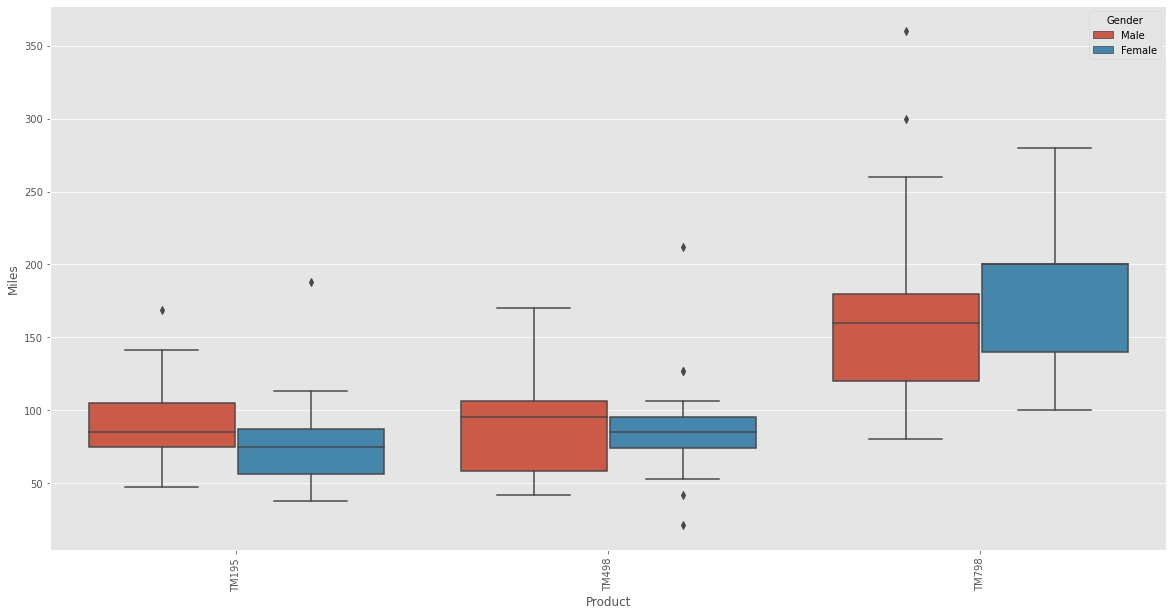

In [31]:
plt.figure(figsize = (20,10))
sns.boxplot(x='Product', y='Miles', data=cardio, hue= 'Gender')
plt.xticks(rotation=90); # To rotate the x axis labls

Observations: 
1. TM798 product, as expected becasue of more usage, is more affected running performance based on the data set.
2. the product slighltly increased female performance more than male performance as expected, because females used slighly more than males.
3. TM498 product look like having outlier issue on female side, so needs to pay attention.

#### Looking at what are the product usage by Age?

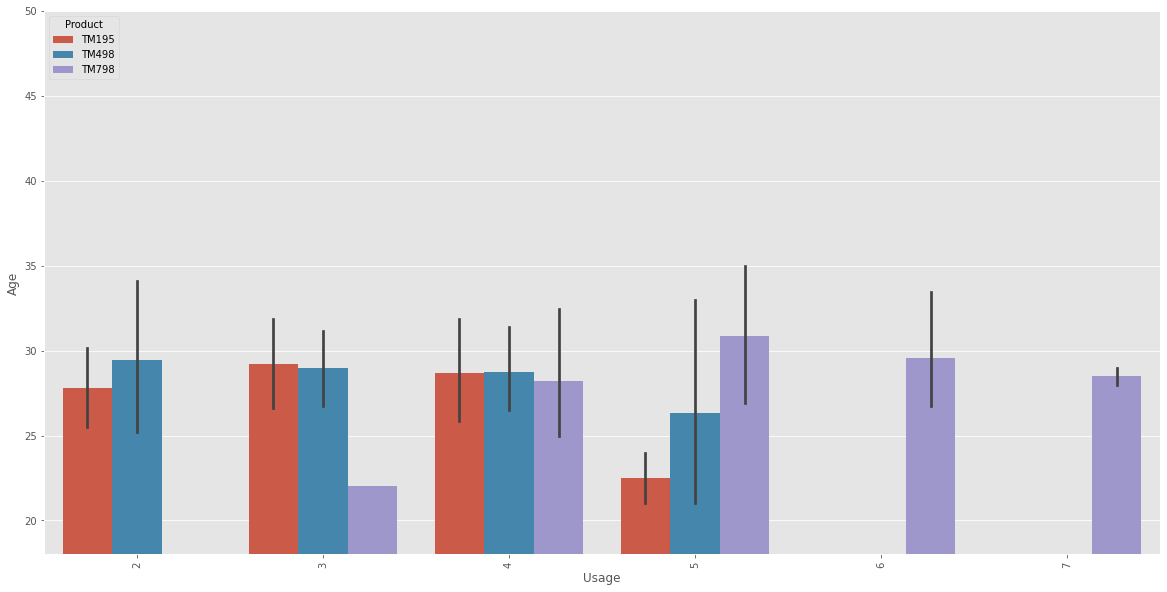

In [32]:
plt.figure(figsize = (20,10))
sns.barplot(y='Age', x='Usage', data=cardio, hue = 'Product')
plt.ylim(18,50)
plt.xticks(rotation=90); # To rotate the x axis labls

Onservation: 
1. As expected, Young persons, age in ranging in 25-30,  use these products, mostly product TM798, more than other people. 
2. This indicates that, even though there is no any meaningfull corelation between usage and age, our target population seems to the young generation. 

#### Looking at  what product does affect the most of costumer running performance(Miles) by Age?

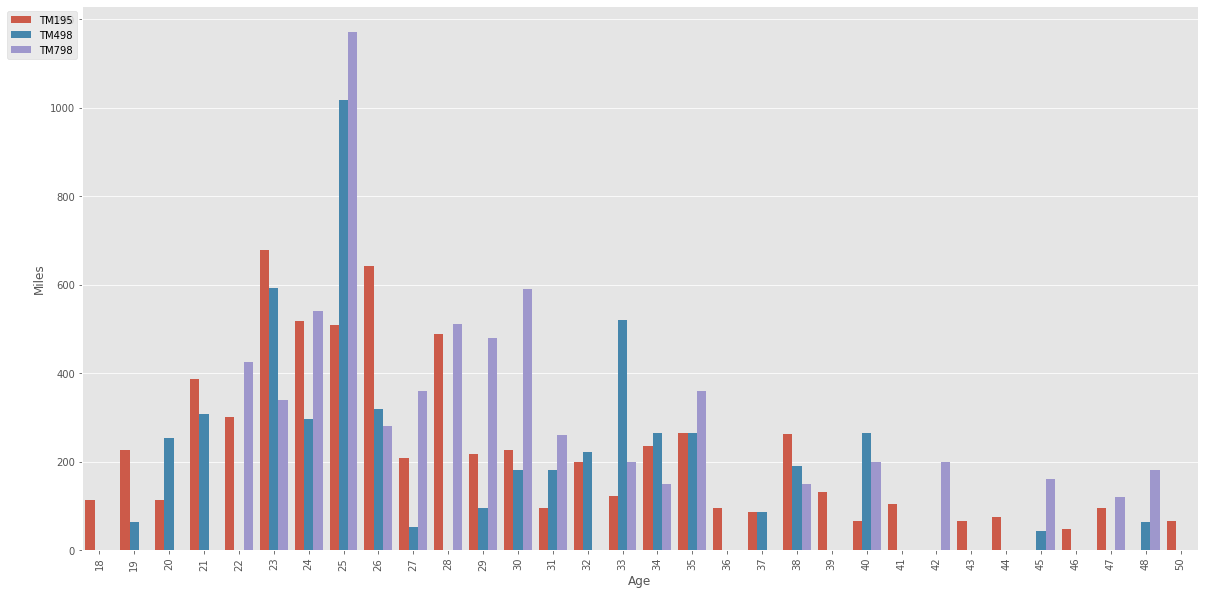

In [33]:
# Add hue parameter to the pointplot to plot for each Age
plt.figure(figsize = (20,10)) # To resize the plot
sns.barplot(x='Age', y='Miles', data=cardio, estimator=sum, ci=None, hue = 'Product')
plt.legend(bbox_to_anchor=(0,1))
plt.xticks(rotation=90); # To rotate the x axis labls

Observations: 
* As expected, More Usage of the Products is affected positively to running performance for young people range in 22-27 

#### Looking at  what product does affect the most of costumer Fitness Score?

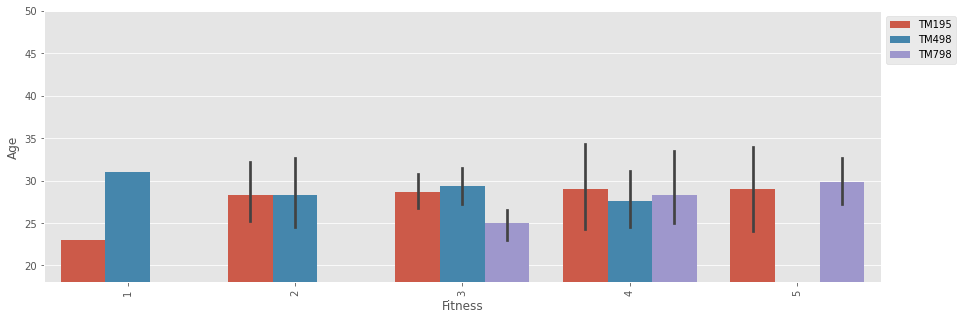

In [34]:
# Add hue parameter to the pointplot to plot for each Product
plt.figure(figsize = (15,5)) # To resize the plot
sns.barplot(x='Fitness', y='Age', data=cardio, hue = 'Product')
plt.legend(bbox_to_anchor=(1,1))
plt.ylim(18,50)
plt.xticks(rotation=90); # To rotate the x axis labls

Observations: 
* As expected, More Usage of the Products is affected positively to Fitness Score, so Age range in 25-30 was the most usage range based on dataset
* While TM195 product usage decrease , Fitness score increasing first, then boost Fitness score to highest level.
* mostly used and most effective product seems TM195 by the graph.

#### Looking at  How income effect Usage of the product and Fitness Score?

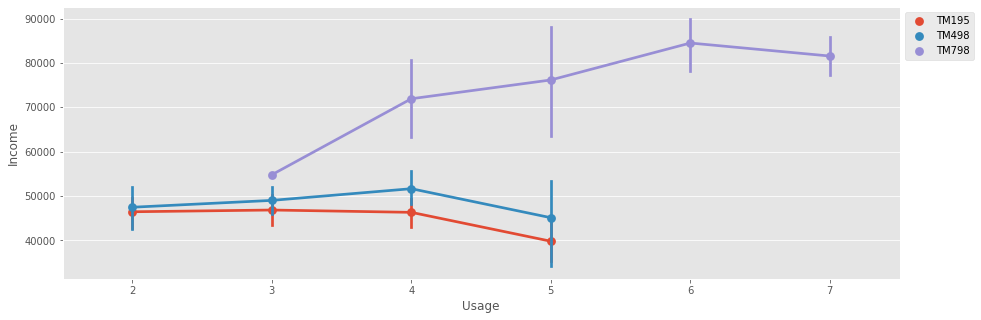

In [35]:
plt.figure(figsize= (15,5))
sns.pointplot(x="Usage", y= "Income", data=cardio,  hue= 'Product');
plt.legend(bbox_to_anchor=(1,1));


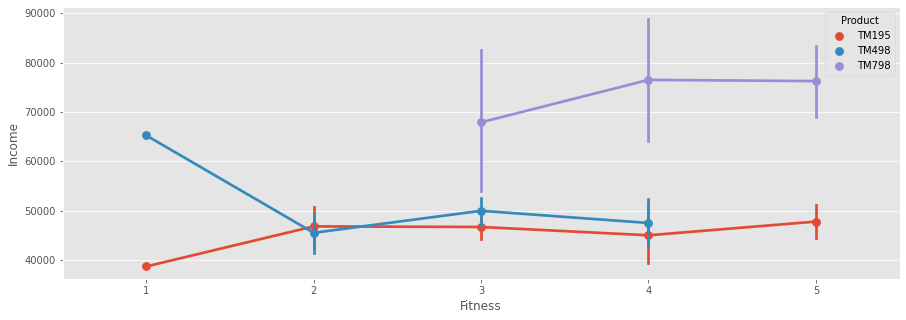

In [36]:
plt.figure(figsize= (15,5))
sns.pointplot(x="Fitness", y= "Income", data=cardio, hue= "Product");

Observations: 
1. interestingly, TM498 and TM195 product's usage Not increasing by income
2. Same as, TM498 and TM195 product's usage is also Not increasing by income, and there is a negative impact first for TM498 product.
3. Fitness Score is slightly increasing by income for only the TM798 product.
4. Usage of the product is not affected by Income based on dataset.

#### Look at product usage and fitness score is by marital status and gender

In [37]:
cardio.columns
cardio.MaritalStatus.unique()

array(['Single', 'Partnered'], dtype=object)

(array([0, 1]), [Text(0, 0, 'Male'), Text(1, 0, 'Female')])

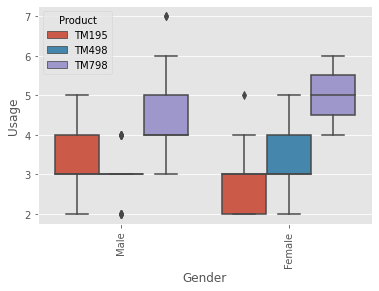

In [38]:
sns.boxplot(x="Gender", y="Usage", data=cardio, hue= "Product")
plt.xticks(rotation=90) # To rotate the x axis labls

Observation:
1. women use the products more than men.

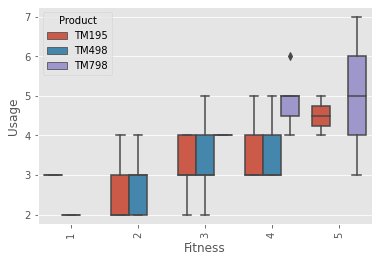

In [39]:
sns.boxplot(x="Fitness", y="Usage", data=cardio, hue= "Product")
plt.xticks(rotation=90); # To rotate the x axis labls

Observation:
1. If people use, product TM798 more effective for Fitness Score than other.

<Figure size 1440x720 with 0 Axes>

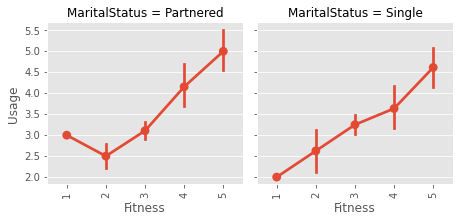

In [40]:
cardio.Fitness = cardio.Fitness.astype('category') # To convert Fitness score into categories
cardio.MaritalStatus = cardio.MaritalStatus.astype('category') # To convert MaritalStatus into categories

plt.figure(figsize= (20,10))
cplot2=sns.catplot(x='Fitness', y='Usage', 
            data=cardio[cardio["MaritalStatus"].isin(["Single","Partnered"])],
                estimator=np.mean, col="MaritalStatus", kind="point",
                height=3,col_wrap = 5)
cplot2.set_xticklabels(rotation=90)
plt.show()

Observation:
1. single people product usage rate is highly correlative with Fitness score, as expected.
2. Partenered people product usage sligthly decreased but fitness score is improved first, but later, they are higly correlative to each other. 

<Figure size 1440x720 with 0 Axes>

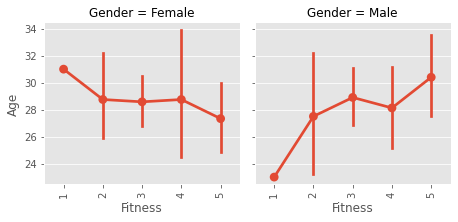

In [41]:
cardio.Fitness = cardio.Fitness.astype('category') # To convert Fitness score into categories
cardio.MaritalStatus = cardio.MaritalStatus.astype('category') # To convert MaritalStatus into categories
cardio.Gender = cardio.Gender.astype('category') # To convert Gender score into categories


plt.figure(figsize= (20,10))
cplot2=sns.catplot(x='Fitness', y='Age', 
            data=cardio[cardio["Gender"].isin(["Male","Female"])],
                estimator=np.mean, col="Gender", kind="point",
                height=3,col_wrap = 5)
cplot2.set_xticklabels(rotation=90)
plt.show()

Observation:
1. Women product usage rate is highly correlative with Fitness score, as expected.
2. Men product usage sligthly decreased but fitness score is improved first, but later, they are higly correlative to each other. 

In [42]:
cardio.Fitness = cardio.Fitness.astype('int64') # To convert Fitness score back into int64
cardio.MaritalStatus = cardio.MaritalStatus.astype('object') # To convert MaritalStatus back into object
cardio.Gender = cardio.Gender.astype('object') # To convert Gender back into object
cardio.Age = cardio.Age.astype('int64') # To convert Gender back into object
cardio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


#### Look at what product usage and fitness score is by marital status

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5')])

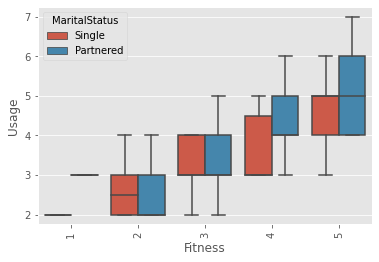

In [43]:
sns.boxplot(x="Fitness", y="Usage", data=cardio, hue= "MaritalStatus")
plt.xticks(rotation=90) # To rotate the x axis labls

Observations: 
1. Partnered people use th products more than single
2. As expected, partenered people fitness score higher than singles.

####  Look at Miles and fitness score is by Usage

<AxesSubplot:xlabel='Fitness', ylabel='Miles'>

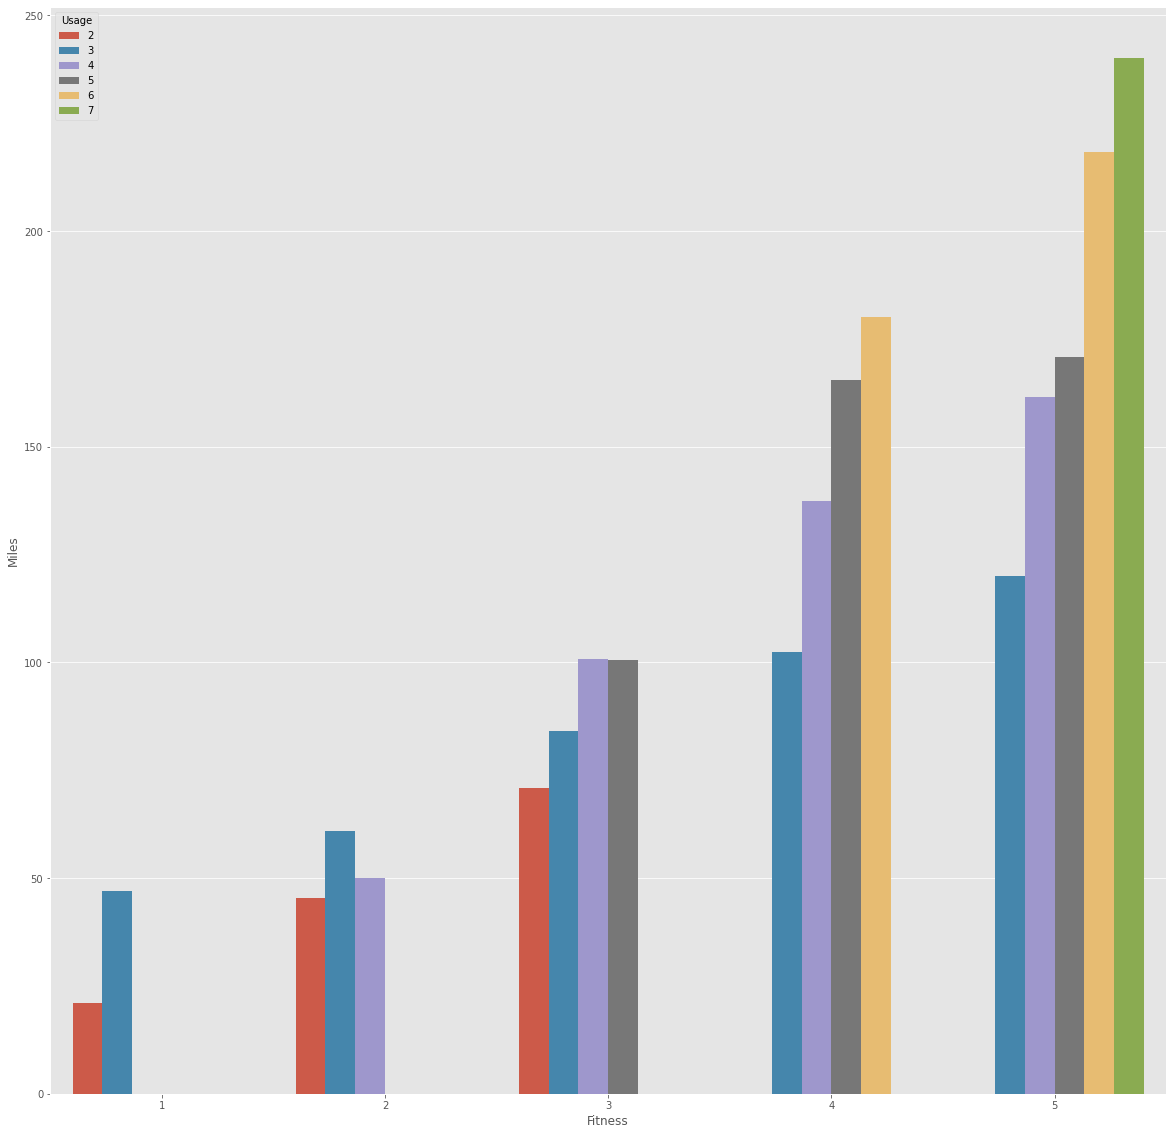

In [44]:
plt.figure(figsize = (20,20)) # To resize the plot

sns.barplot(x="Fitness", y="Miles", data=cardio.sort_values("Usage", ascending=False), hue= 'Usage', ci=None)


Observations:
1. As expected, Miles and Fitness score is highly positive correlative with product Usage.


#### look at what Fitness and Usage distribution by Age to whom people use the products

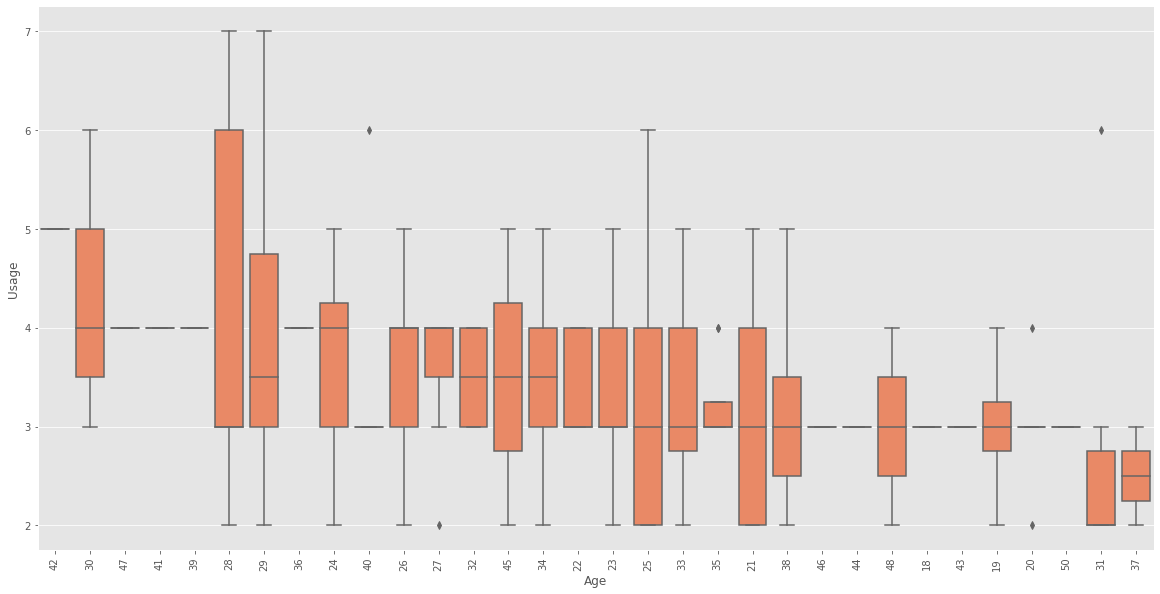

In [45]:
plt.figure(figsize = (20,10)) # To resize the plot
sns.boxplot(data = cardio, x = "Age", y = "Usage", color = "coral",
            order=cardio.groupby('Age').Usage.mean().sort_values(ascending = False).index)
plt.xticks(rotation=90); # To rotate the x axis lables


Observations:
1. Most people's Age who highly used the products is ranging 22-30.

#### look at what is average Fitness score by Age 

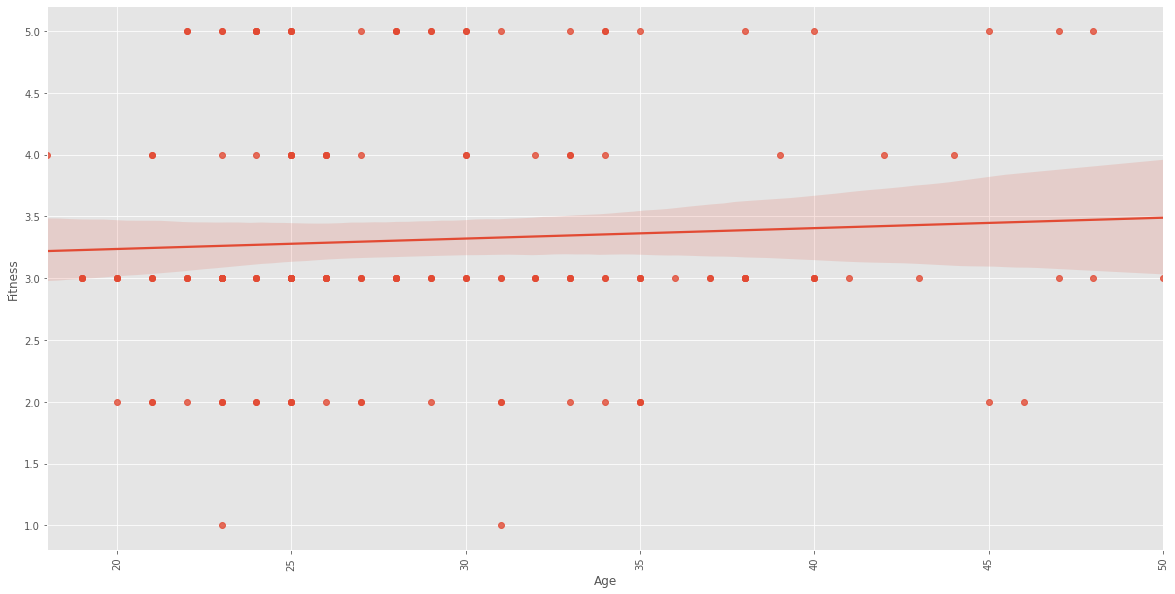

In [46]:
plt.figure(figsize = (20,10)) # To resize the plot
sns.regplot(data = cardio, x = "Age", y = "Fitness")
plt.xticks(rotation=90); # To rotate the x axis lables

#### look at what is average Fitness score by Education 

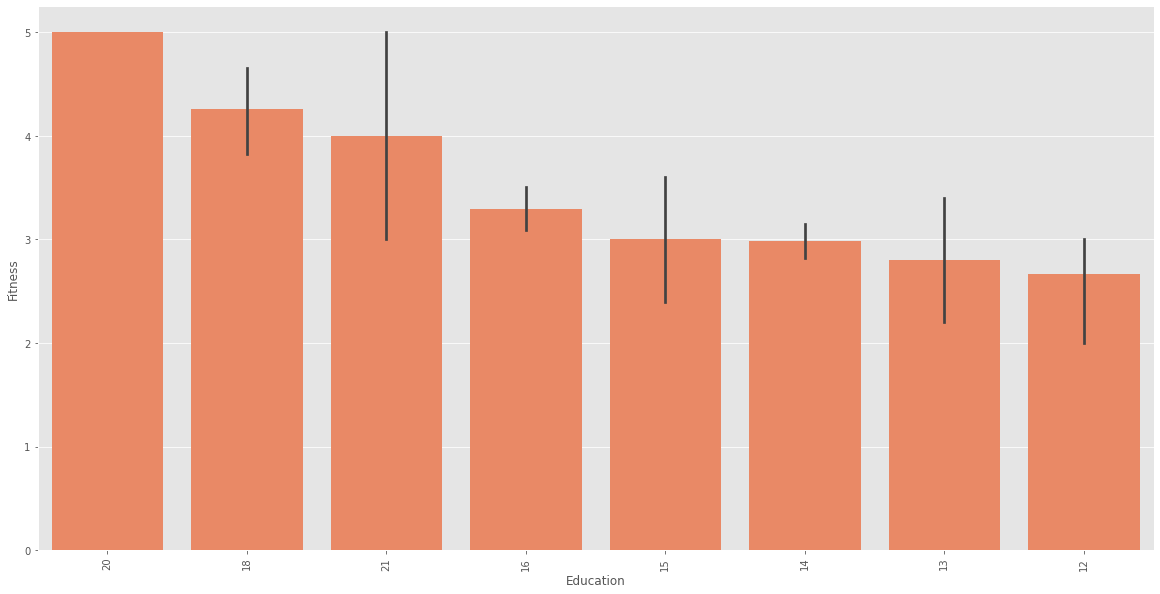

In [47]:
plt.figure(figsize = (20,10)) # To resize the plot
sns.barplot(data = cardio, x = "Education", y = "Fitness", color = "coral",
            order=cardio.groupby('Education').Fitness.mean().sort_values(ascending = False).index)
plt.xticks(rotation=90); # To rotate the x axis lables

#### look at what is average Education  by  Age

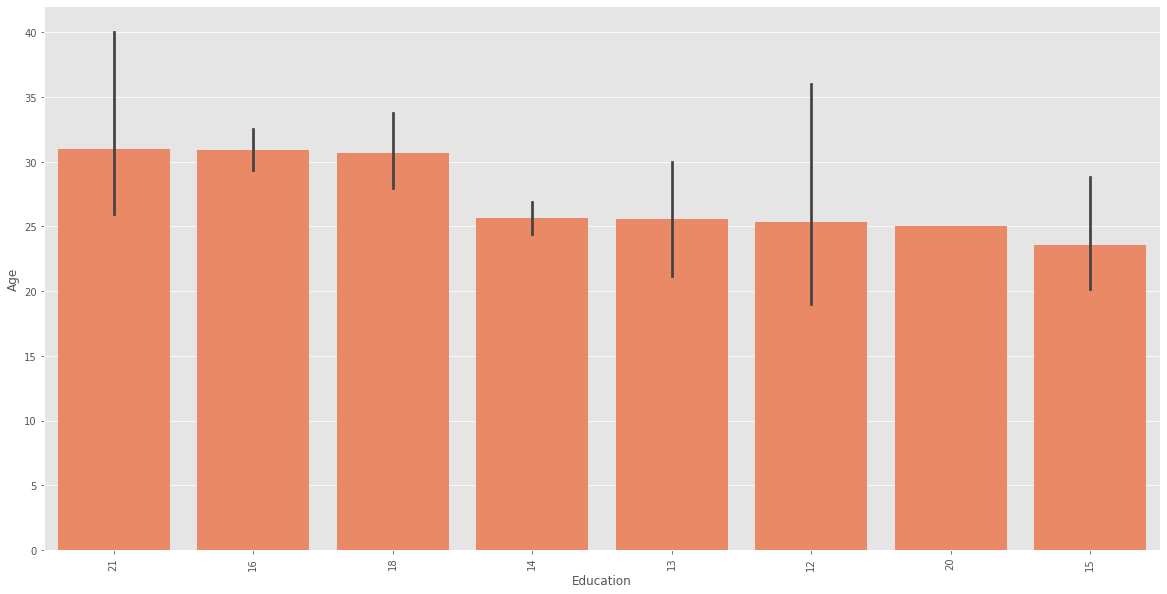

In [48]:
plt.figure(figsize = (20,10)) # To resize the plot
sns.barplot(data = cardio, y = "Age", x = "Education", color = "coral",
            order=cardio.groupby('Education').Age.mean().sort_values(ascending = False).index)
plt.xticks(rotation=90); # To rotate the x axis lables

Observations:
1. interestingly, Fitness score is slightly positive effect by Age, but it is highly positive effect among people who's age ranging 22-30 and 38-47 used the products more.
2. Education time is positvely high correlation to Fitness score. It's explain why youngest and older people fitness score is high and why they used these product.
3. while age is increasing, education time is increased, as expected.

#### look at what is Usage by Education and Income

<AxesSubplot:xlabel='Education', ylabel='Income'>

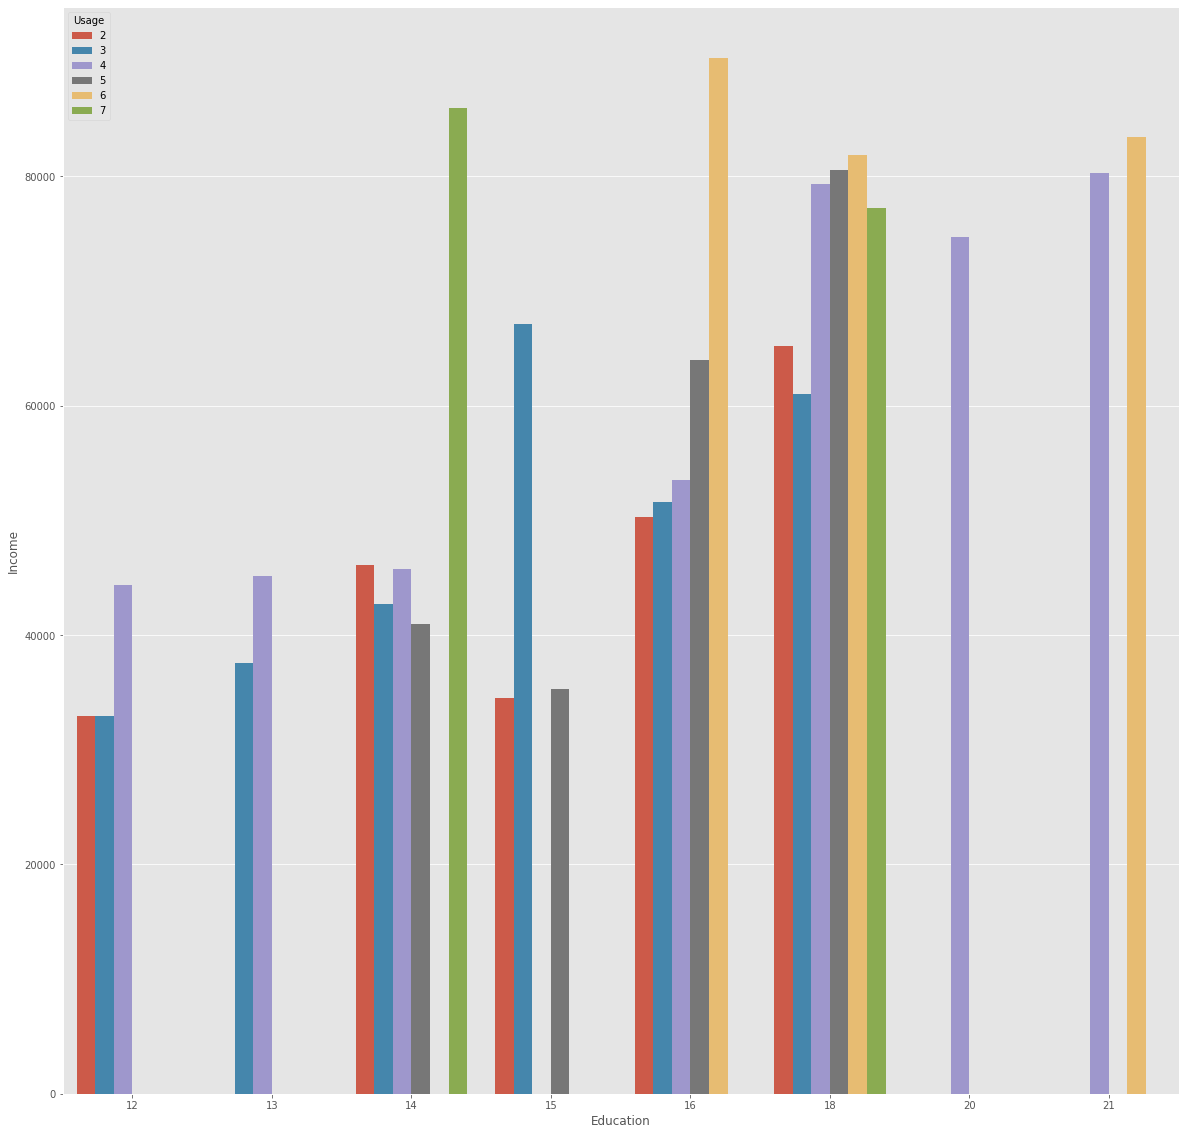

In [49]:
plt.figure(figsize = (20,20)) # To resize the plot

sns.barplot(x="Education", y="Income", data=cardio.sort_values("Usage", ascending=False), hue= 'Usage', ci=None)

<AxesSubplot:xlabel='Education', ylabel='Income'>

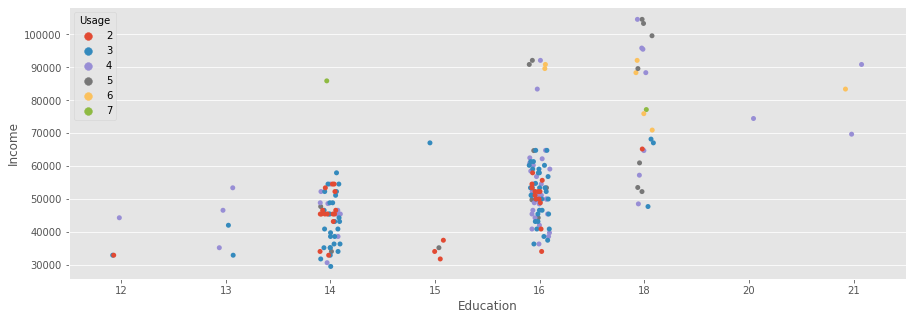

In [50]:
plt.figure(figsize = (15,5)) # To resize the plot

sns.stripplot(x="Education", y="Income", data=cardio.sort_values("Usage", ascending=False), hue= 'Usage')

Observations:
1. Education has positive effect to income.
2. Normally Income slightly affect positive way to usage but, when income and education come together, we see more positive effect to Usage of the products.

#### Interactive scatter plot using plotly package

In [51]:
import plotly.express as px
px.scatter(cardio, x = 'Fitness', y = 'Usage', animation_frame = 'Product', size = 'Usage')

Observations:
* we can see anime about what product affect mostly to Fitness score when people use.

### Conclusion

We can conclude that;

* when product usage is increased, Fitness score is also increased.
* Education level also affects to use these product positive way.
* Normally, Income slightly affect positive way to Usage of product and indrectly Fitness score, but Education and income together highly affects positive way to Usage of product and Fitness Scores.
* Education level is increased by age so that why education level positively affect to usage among older ages that ranging 37-48.
* Marital Status affect positive way to usage of product and Fitness score.
* Partnered people use the products more than single
* As expected, partenered people fitness score higher than singles.
* As expected, Miles and Fitness score is highly positive correlative with product Usage. 
* there is slightly positive relationship between income and product usage, and running Miles performans.
* Women product usage higher than men.
* people used product TM798 more than others and it affect positively their Fitness score. 
* So, Lastly, we can say people liked product TM798 and focus on selling for the product TM798